# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE

# Logistic Regression

In [2]:
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [3]:
df.head

<bound method NDFrame.head of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax

In [4]:
# Separate the features (x) and the target variable (y)
y = df['Bankrupt?']
x = df.drop(columns=['Bankrupt?'])

# Split the dataset into the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.964


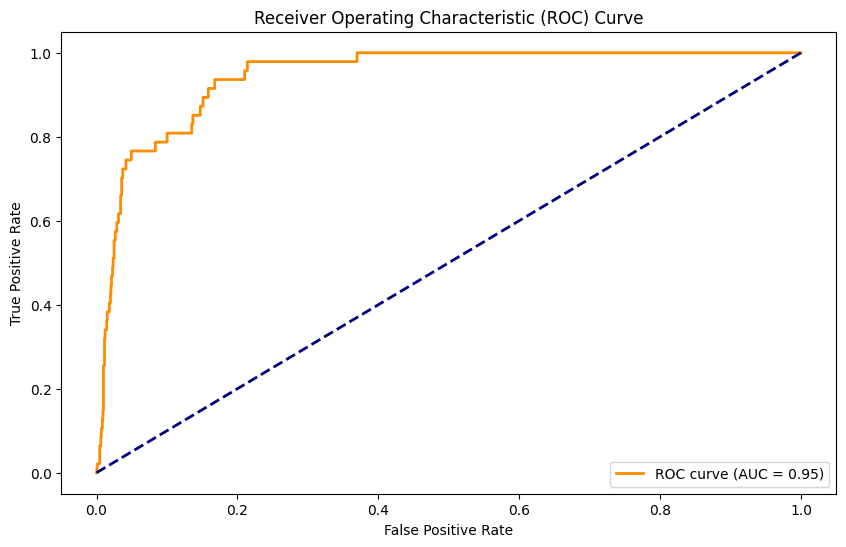

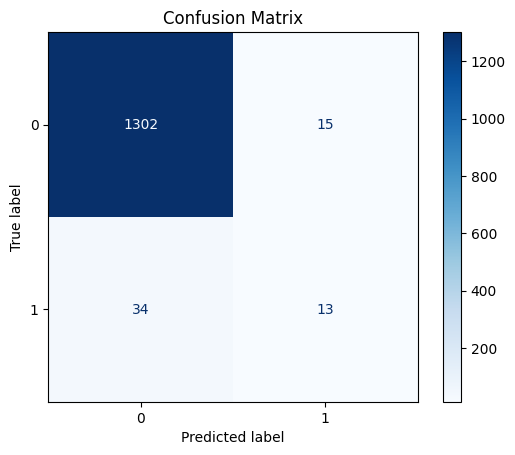

AUC Score: 0.945
F1 Score: 0.347

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1317
           1       0.46      0.28      0.35        47

    accuracy                           0.96      1364
   macro avg       0.72      0.63      0.66      1364
weighted avg       0.96      0.96      0.96      1364



In [6]:
# Get prediction probabilities 
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1323
           1       0.26      0.37      0.31        41

    accuracy                           0.95      1364
   macro avg       0.62      0.67      0.64      1364
weighted avg       0.96      0.95      0.95      1364

Confusion Matrix:
[[1281   42]
 [  26   15]]


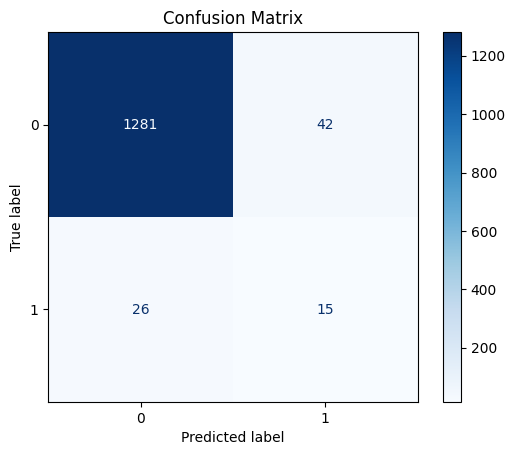

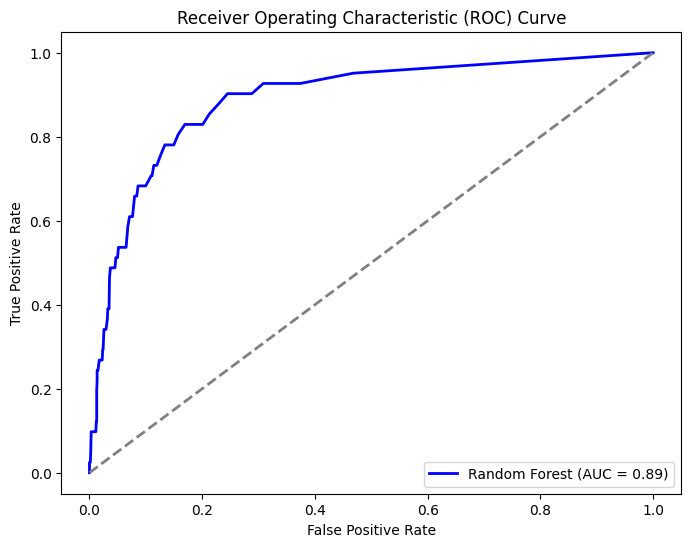

AUC Score: 0.8889


In [7]:
# Create training and test data
y = np.array(df['Bankrupt?'])
x = np.array(df.drop('Bankrupt?', axis=1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(x_test_scaled)

# Evaluate the model

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix as a heatmap
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
print(f"AUC Score: {roc_auc:.4f}")


/var/folders/c9/83t_p7011dv7z71pbzhhwr700000gn/T/ipykernel_4833/4281403622.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')


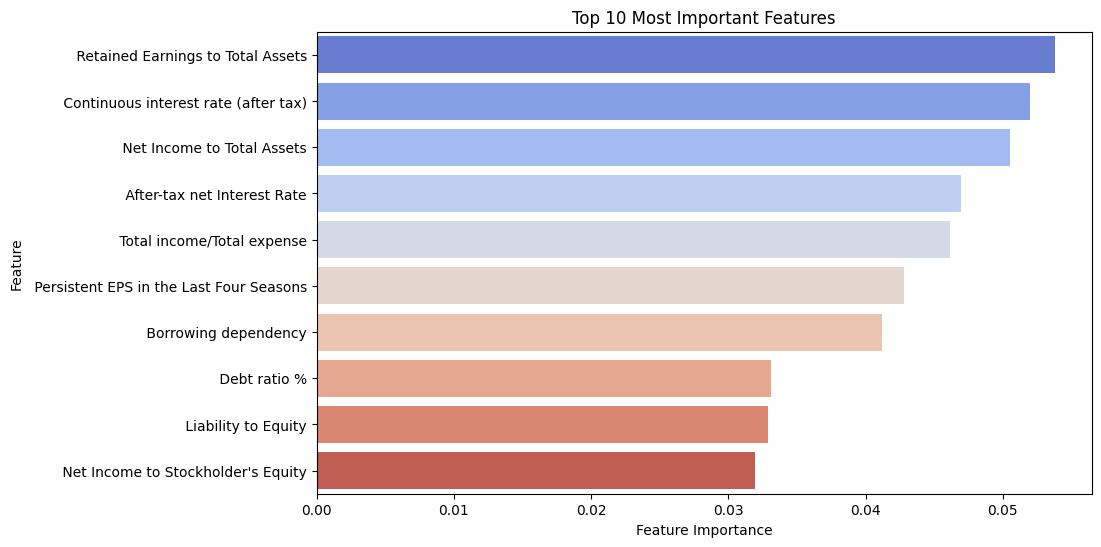

Top 10 Most Important Features:
                                     Feature  Importance
67         Retained Earnings to Total Assets    0.053766
9       Continuous interest rate (after tax)    0.051971
85                Net Income to Total Assets    0.050516
7                After-tax net Interest Rate    0.046980
68                Total income/Total expense    0.046126
18   Persistent EPS in the Last Four Seasons    0.042790
39                      Borrowing dependency    0.041158
36                              Debt ratio %    0.033120
90                       Liability to Equity    0.032920
89        Net Income to Stockholder's Equity    0.031954


In [8]:
x = df.drop(columns=['Bankrupt?']) 
y = df['Bankrupt?']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to view the feature importance with corresponding feature names
# Use the original feature names from the X DataFrame, since X_train_resampled is a numpy array now
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,  # Feature names from the original DataFrame X
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Optionally: print the feature importance table (Top 10)
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))